## Installazione

Se non hai ancora installato le librerie, esegui nel terminale:

```bash
pip install matplotlib numpy pandas seaborn scikit-learn
```

In [4]:
# Importiamo le librerie necessarie
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Configurazione iniziale per grafici belli
sns.set_theme(style="whitegrid")  # Stile pulito con griglia
sns.set_palette("husl")           # Palette di colori armoniosa

print("Librerie importate con successo!")
print(f"  Versione seaborn: {sns.__version__}")

Librerie importate con successo!
  Versione seaborn: 0.13.2


## Fondamenti di Matplotlib

Seaborn costruisce sopra Matplotlib; conoscere i concetti base di Matplotlib ti dà controllo completo sui grafici quando serve.

Concetti chiave:

- Figure: il contenitore principale che può contenere una o più aree di disegno (subplots). Si crea con `plt.figure()` o `fig, ax = plt.subplots()`.
- Axes: l'area dove si disegnano i dati (spesso chiamata `ax`). Ha metodi per titolo/etichette/limiti: `ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()`.
- Axis: gli assi X e Y — puoi impostare limiti e tick.

Metodi utili (sintesi e esempi):

```python
fig, ax = plt.subplots(figsize=(6,4))  # crea Figure e Axes
ax.plot(x, y, marker='o')              # disegna i dati
ax.set_title('Titolo del grafico')     # imposta il titolo
ax.set_xlabel('Asse X')                # etichetta asse X
ax.set_ylabel('Asse Y')                # etichetta asse Y
ax.set_xlim(0, 10)                     # limita l'intervallo X
ax.set_ylim(-1, 1)                     # limita l'intervallo Y
ax.set_xticks([0,2,4,6,8,10])          # imposta i tick dell'asse X
ax.grid(True, alpha=0.3)               # aggiunge la griglia
ax.legend(['serie 1'])                 # aggiunge legenda (se ci sono più serie)
plt.tight_layout()                     # sistema gli spazi nella figura
plt.savefig('plot.png', dpi=300, bbox_inches='tight')  # salva immagine
```

Annotazioni e testi:
- `ax.text(x, y, 'testo')` per aggiungere testo libero all'interno del grafico.
- `ax.annotate('punto', xy=(x,y), xytext=(x+1,y+1), arrowprops=dict(arrowstyle='->'))` per annotazioni con freccia.

Interoperabilità con Seaborn:
- Seaborn accetta il parametro `ax=` per disegnare su un `Axes` esistente, quindi puoi creare `fig, axes = plt.subplots(...)` e passare singoli `ax` a `sns.*`.
- Se si è creato il grafico con `plt.figure()` senza specificare `ax`, è possibile chiamare le funzioni su plt (`es. plt.title()`) poiché verrà considerato l'unico `ax` disponibile

Nota sullo stile:
- Gli stili di Seaborn/Matplotlib (es. `sns.set_style('whitegrid')`) vanno impostati **prima** di creare la figura se vuoi che influenzino lo sfondo e la griglia. 

Salvare un grafico:
- si può fare facilmente con la funzione plt.savefig('plot.png', dpi=300, bbox_inches='tight') 

---

## 1. Caricare i Dati

Useremo il famoso **dataset Iris** che contiene misurazioni di 150 fiori di 3 specie diverse.

Seaborn funziona benissimo con **DataFrame Pandas** - basta passare il nome delle colonne!

In [5]:
# Carichiamo il dataset Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rinominiamo le colonne per semplicità (opzionale ma utile)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("Dataset Iris:")
print(f"  Righe: {len(df)}, Colonne: {len(df.columns)}")
print(f"  Specie: {list(df['species'].unique())}")
print("\nPrime 5 righe:")
df.head()

Dataset Iris:
  Righe: 150, Colonne: 5
  Specie: ['setosa', 'versicolor', 'virginica']

Prime 5 righe:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---

## 2. Scatter Plot (Diagramma a Dispersione)

Mostra la **relazione tra due variabili numeriche**. Ogni punto è un'osservazione.

### La funzione: `sns.scatterplot()`

**Parametri più importanti:**
- `data=` → il DataFrame con i dati
- `x=` → nome della colonna per l'asse X
- `y=` → nome della colonna per l'asse Y
- `hue=` → colora i punti in base a una categoria (es. specie)
- `size=` → varia la dimensione dei punti
- `style=` → varia la forma dei punti

**Nota**: basta passare i **nomi delle colonne** come stringhe!

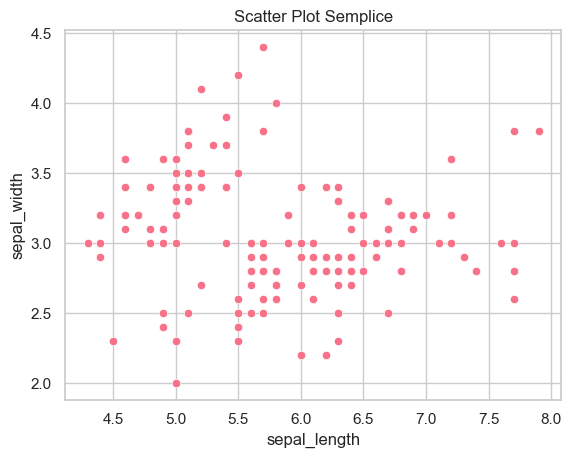

In [4]:
# Scatter plot BASE - solo 1 riga di codice!
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.title('Scatter Plot Semplice')
plt.show()

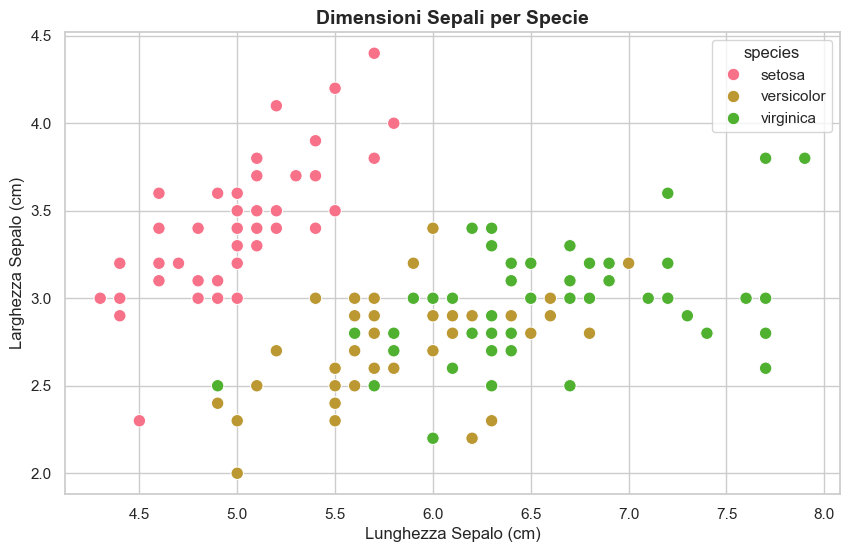

Con hue='species' seaborn colora automaticamente i punti per gruppo!


In [30]:
# Scatter plot COLORATO per specie - aggiungiamo hue=
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', s=80)
plt.title('Dimensioni Sepali per Specie', fontsize=14, fontweight='bold')
plt.xlabel('Lunghezza Sepalo (cm)')
plt.ylabel('Larghezza Sepalo (cm)')
plt.show()

print("Con hue='species' seaborn colora automaticamente i punti per gruppo!")

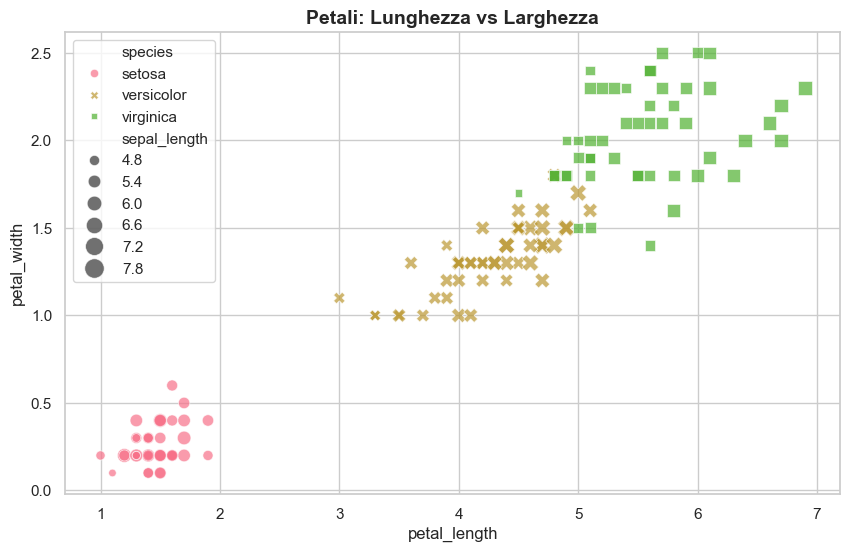

In [6]:
# Scatter plot AVANZATO - colore + dimensione + stile
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='petal_length', 
    y='petal_width', 
    hue='species',        # Colore per specie
    style='species',      # Forma diversa per specie
    size='sepal_length',  # Dimensione in base a lunghezza sepalo
    sizes=(30, 200),      # Range dimensioni punti
    alpha=0.7             # Trasparenza
)
plt.title('Petali: Lunghezza vs Larghezza', fontsize=14, fontweight='bold')
plt.show()

### ESERCIZIO 1: Scatter Plot

Crea uno scatter plot che mostri:
- Asse X: `petal_length`
- Asse Y: `sepal_length`
- Colore: per specie

Aggiungi un titolo a tua scelta.

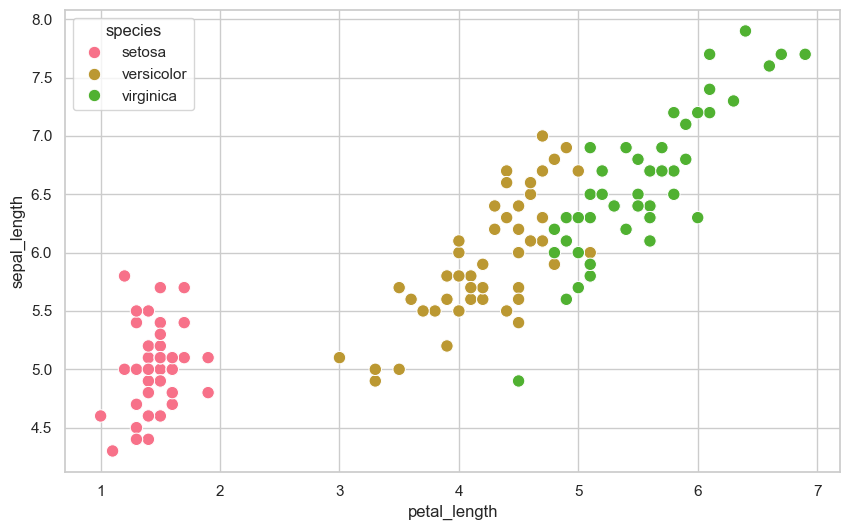

In [13]:
# SCRIVI IL TUO CODICE QUI
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='petal_length', 
    y='sepal_length', 
    hue='species',
    s=80
)
plt.show()

<details>
<summary>Clicca per vedere la soluzione</summary>

```python
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='sepal_length', hue='species', s=80)
plt.title('Relazione tra Petali e Sepali')
plt.show()
```
</details>

---

## 3. Istogramma e Distribuzione

Mostra come sono **distribuiti** i valori di una variabile.

### La funzione: `sns.histplot()`

**Parametri più importanti:**
- `data=` → il DataFrame
- `x=` → la colonna da visualizzare
- `hue=` → divide l'istogramma per categoria
- `bins=` → numero di "barre" (intervalli)
- `kde=True` → aggiunge la curva di densità (liscia)

**KDE** (Kernel Density Estimate) = una curva che approssima la forma della distribuzione

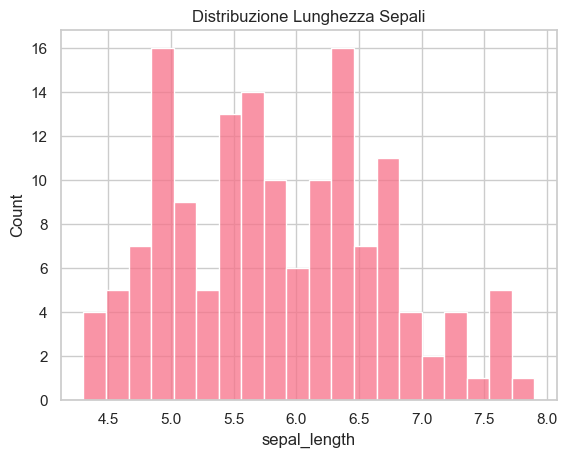

In [8]:
# Istogramma BASE
sns.histplot(data=df, x='sepal_length', bins=20)
plt.title('Distribuzione Lunghezza Sepali')
plt.show()

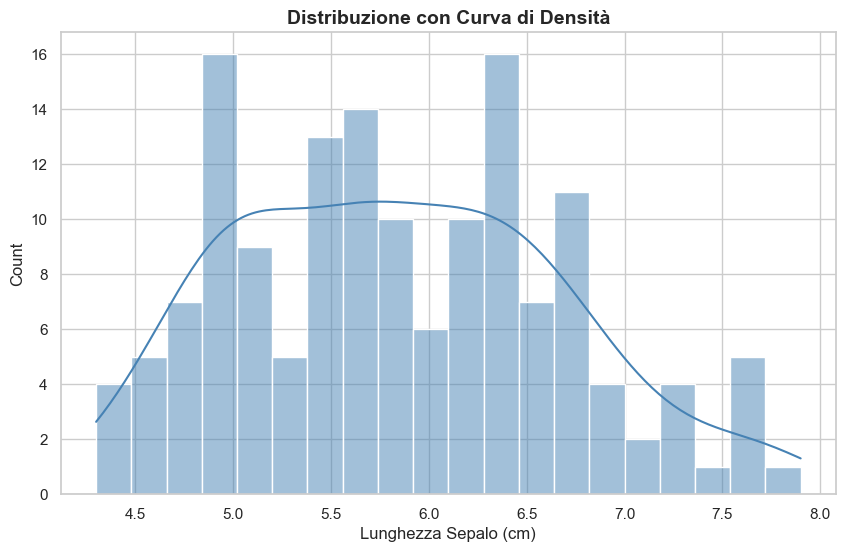

La curva KDE mostra la 'forma' della distribuzione in modo più liscio


In [9]:
# Istogramma con KDE (curva di densità)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_length', bins=20, kde=True, color='steelblue')
plt.title('Distribuzione con Curva di Densità', fontsize=14, fontweight='bold')
plt.xlabel('Lunghezza Sepalo (cm)')
plt.show()

print("La curva KDE mostra la 'forma' della distribuzione in modo più liscio")

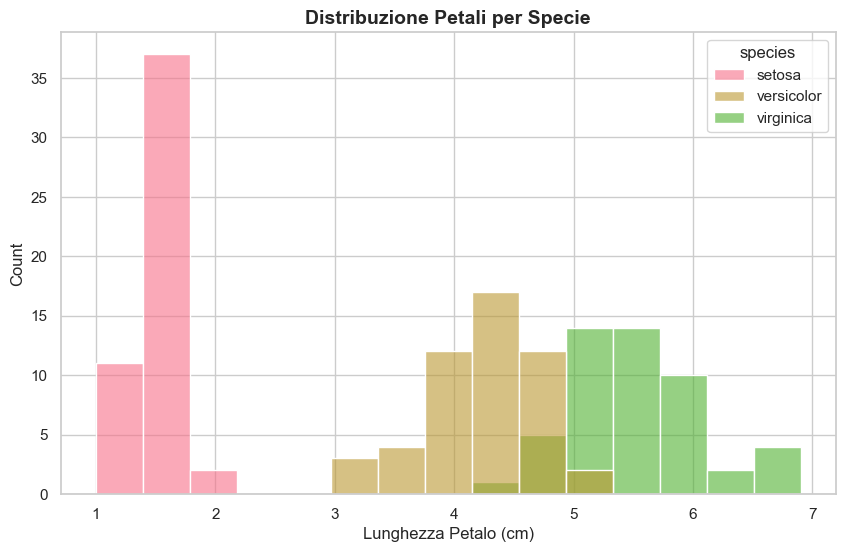

Osserva come la Setosa abbia petali molto più corti!


In [10]:
# Istogramma DIVISO per specie
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='petal_length', hue='species', bins=15, alpha=0.6)
plt.title('Distribuzione Petali per Specie', fontsize=14, fontweight='bold')
plt.xlabel('Lunghezza Petalo (cm)')
plt.show()

print("Osserva come la Setosa abbia petali molto più corti!")

### Solo la curva di densità: `sns.kdeplot()`

Se vuoi solo la curva senza le barre:

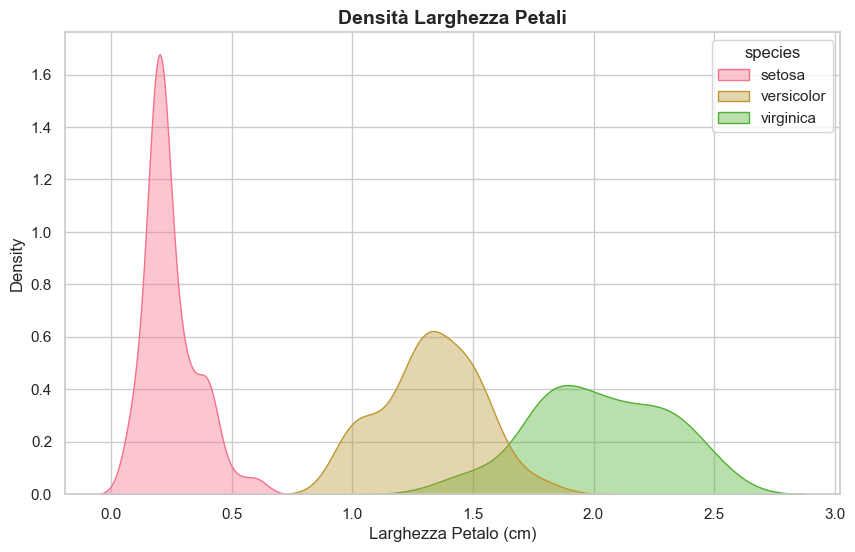

In [11]:
# Solo curve di densità
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='petal_width', hue='species', fill=True, alpha=0.4)
plt.title('Densità Larghezza Petali', fontsize=14, fontweight='bold')
plt.xlabel('Larghezza Petalo (cm)')
plt.show()

### ESERCIZIO 3: Istogramma

Crea un istogramma che mostri la distribuzione di `sepal_width` e aggiungi la curva di densità (KDE).

Aggiungi un titolo a tua scelta.

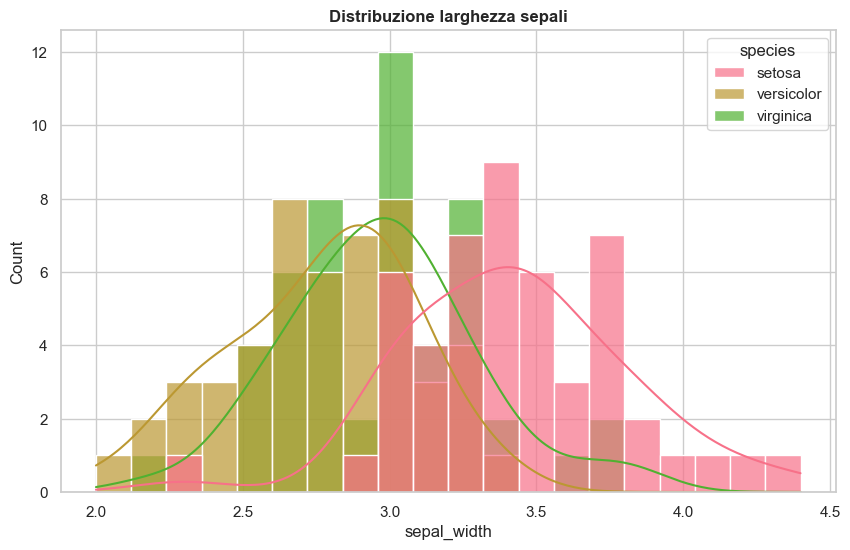

In [18]:
# SCRIVI IL TUO CODICE QUI
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_width', bins=20, hue='species', kde=True, alpha=0.7)
plt.title("Distribuzione larghezza sepali", fontweight='bold')
plt.show()


<details>
<summary>Clicca per vedere la soluzione</summary>

```python
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_width', bins=20, kde=True, color='mediumseagreen')
plt.title('Distribuzione Larghezza Sepali')
plt.xlabel('Larghezza Sepalo (cm)')
plt.show()
```
</details>

---

## 4. Box Plot

Mostra la **distribuzione** di una variabile numerica, evidenziando:
- **Mediana** (linea centrale)
- **Quartili** (i bordi della "scatola")
- **Outliers** (punti isolati)

### La funzione: `sns.boxplot()`

**Parametri più importanti:**
- `data=` → il DataFrame
- `x=` → categoria (per confrontare gruppi)
- `y=` → variabile numerica
- `hue=` → ulteriore divisione per colore

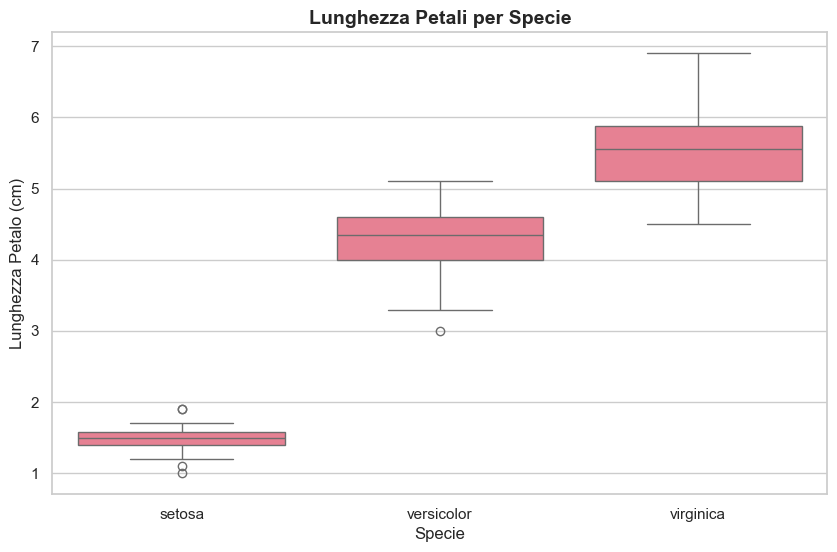

La Virginica ha petali molto più lunghi della Setosa!


In [13]:
# Box plot BASE - confronta le specie
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Lunghezza Petali per Specie', fontsize=14, fontweight='bold')
plt.xlabel('Specie')
plt.ylabel('Lunghezza Petalo (cm)')
plt.show()

print("La Virginica ha petali molto più lunghi della Setosa!")

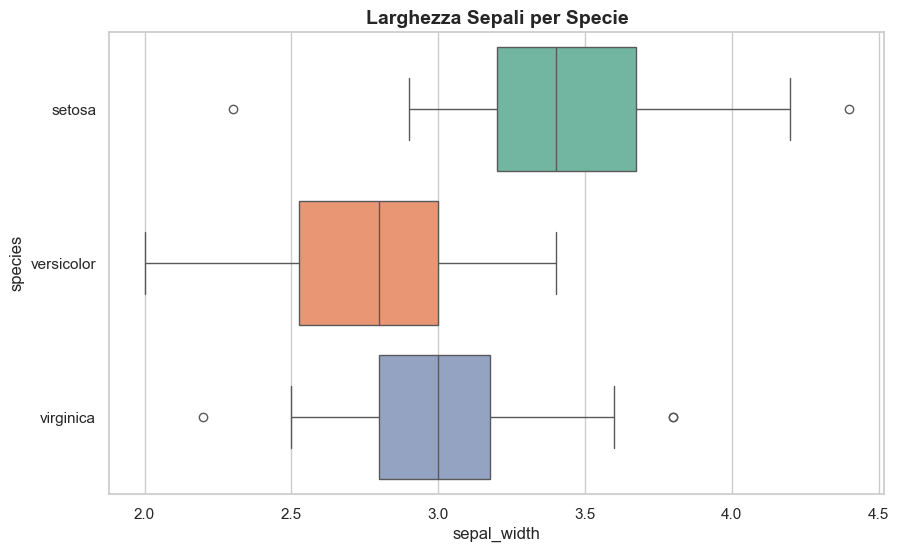

In [14]:
# Box plot orizzontale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='species', x='sepal_width', hue='species', orient='h', palette='Set2')
plt.title('Larghezza Sepali per Specie', fontsize=14, fontweight='bold')
plt.show()

# Per usare il parametro palette, sarà necessario settare il parametro hue. Se non ha senso che esista hue, impostare hue uguale all'asse x o y.

### Violin Plot: Box Plot + Distribuzione

Il **Violin Plot** combina box plot e curva di densità - mostra la "forma" completa della distribuzione.

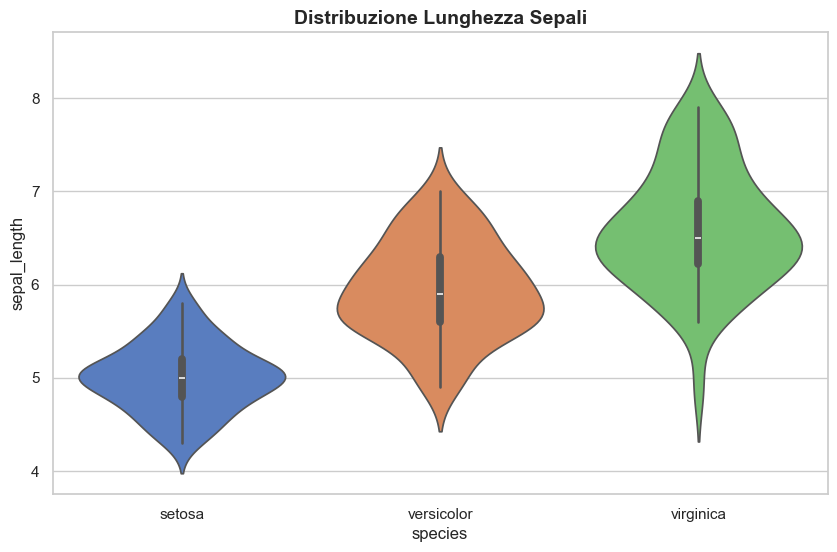

La 'forma del violino' mostra dove si concentrano i dati


In [15]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='species', y='sepal_length', hue='species', palette='muted')
plt.title('Distribuzione Lunghezza Sepali', fontsize=14, fontweight='bold')
plt.show()

print("La 'forma del violino' mostra dove si concentrano i dati")

### ESERCIZIO 2: Box Plot

Crea un box plot che confronti `sepal_width` tra le tre specie.

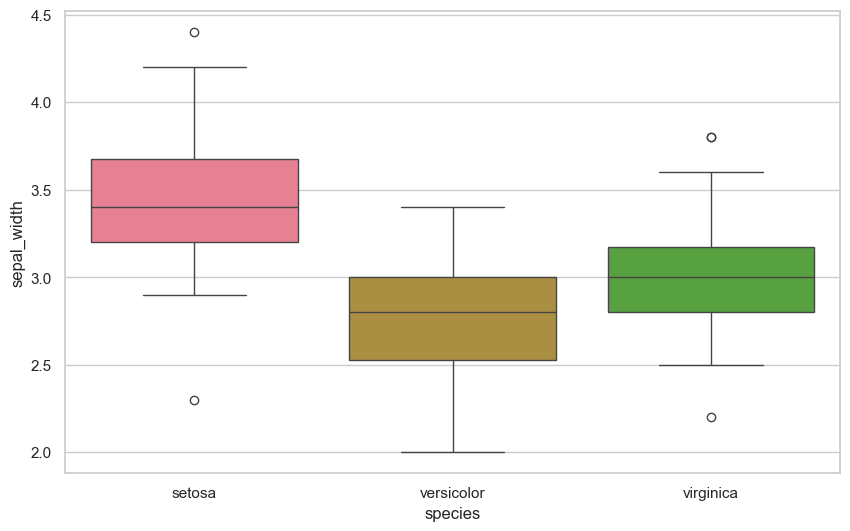

In [20]:
# SCRIVI IL TUO CODICE QUI
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='species', y='sepal_width', hue='species')
plt.show()

<details>
<summary>Clicca per vedere la soluzione</summary>

```python
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='sepal_width', palette='Set2')
plt.title('Larghezza Sepali per Specie')
plt.show()
```
</details>

---

## 5. Bar Plot (Grafico a Barre)

Mostra valori medi o conteggi per **categorie**.

### Due funzioni principali:

1. **`sns.barplot()`** → calcola automaticamente la **media** per ogni gruppo
2. **`sns.countplot()`** → conta automaticamente il **numero** di osservazioni

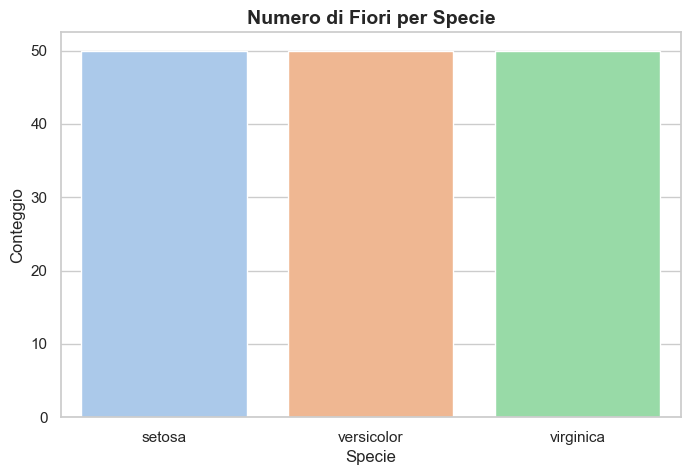

Ogni specie ha 50 campioni nel dataset Iris


In [17]:
# Countplot - conta le osservazioni per categoria
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species', hue='species', palette='pastel')
plt.title('Numero di Fiori per Specie', fontsize=14, fontweight='bold')
plt.xlabel('Specie')
plt.ylabel('Conteggio')
plt.show()

print("Ogni specie ha 50 campioni nel dataset Iris")

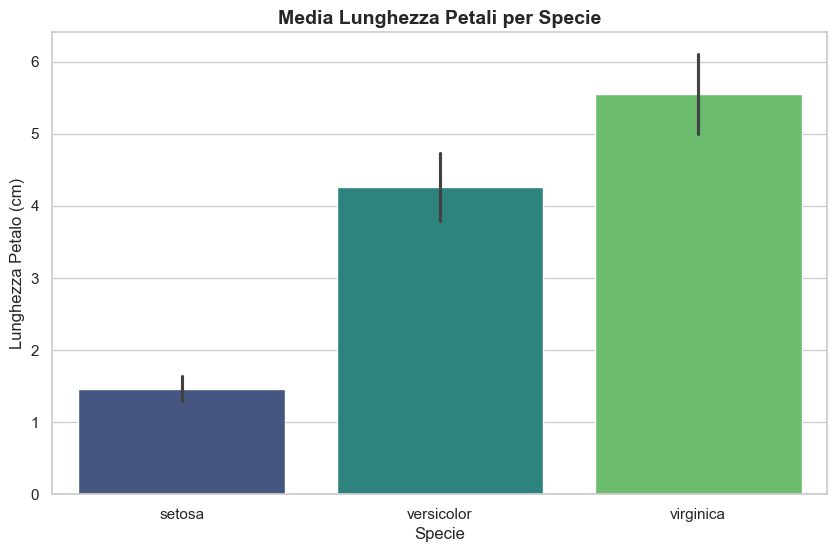

Le linee nere mostrano la deviazione standard (variabilità)


In [18]:
# Barplot - mostra la MEDIA per ogni gruppo
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='petal_length', hue='species', palette='viridis', errorbar='sd')
plt.title('Media Lunghezza Petali per Specie', fontsize=14, fontweight='bold')
plt.xlabel('Specie')
plt.ylabel('Lunghezza Petalo (cm)')
plt.show()

print("Le linee nere mostrano la deviazione standard (variabilità)")

### ESERCIZIO 4: Bar Plot

Crea un bar plot che mostri la media di `sepal_length` per ciascuna specie. Usa una palette a tua scelta e aggiungi un titolo personalizzato.


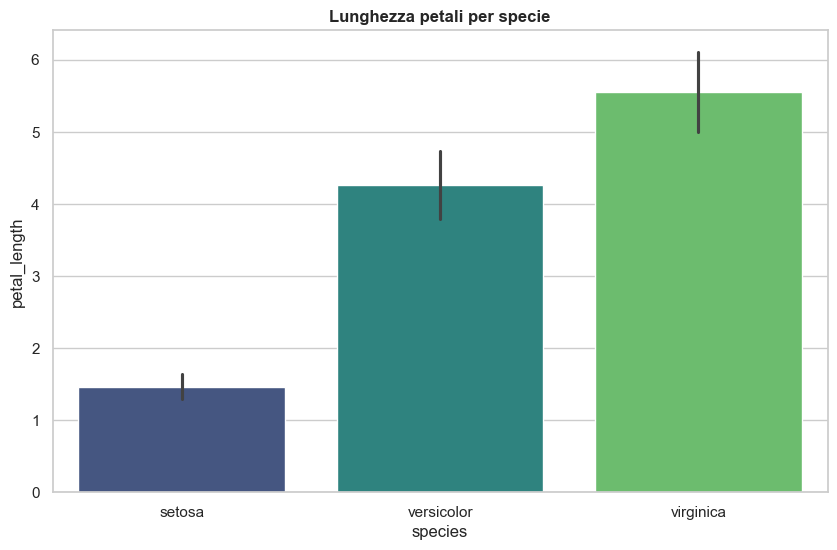

In [22]:
# SCRIVI IL TUO CODICE QUI
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='petal_length', hue='species', palette='viridis', errorbar='sd')
plt.title("Lunghezza petali per specie", fontweight='bold')
plt.show()

<details>
<summary>Clicca per vedere la soluzione</summary>

```python
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='sepal_length', palette='husl', errorbar='sd')
plt.title('Media Lunghezza Sepali per Specie')
plt.xlabel('Specie')
plt.ylabel('Lunghezza Sepalo (cm)')
plt.show()
```
</details>

### Creare dati categorici personalizzati

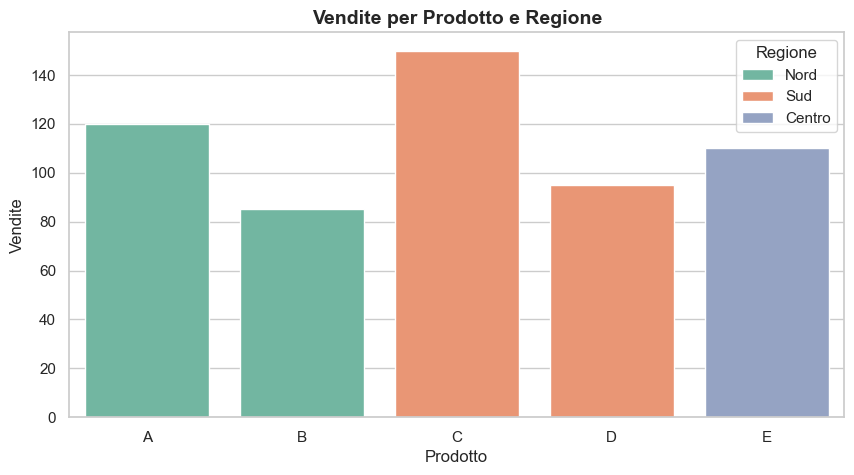

In [20]:
# Creiamo un dataset semplice per le vendite
vendite = pd.DataFrame({
    'Prodotto': ['A', 'B', 'C', 'D', 'E'],
    'Vendite': [120, 85, 150, 95, 110],
    'Regione': ['Nord', 'Nord', 'Sud', 'Sud', 'Centro']
})

plt.figure(figsize=(10, 5))
sns.barplot(data=vendite, x='Prodotto', y='Vendite', hue='Regione', palette='Set2')
plt.title('Vendite per Prodotto e Regione', fontsize=14, fontweight='bold')
plt.show()

---

## 6. Heatmap (Mappa di Calore)

Visualizza una **matrice di valori** usando colori. Perfetta per mostrare **correlazioni** tra variabili.

### La funzione: `sns.heatmap()`

**Parametri più importanti:**
- `annot=True` → mostra i numeri nelle celle
- `cmap=` → palette di colori ('coolwarm', 'viridis', 'Blues'...)
- `vmin, vmax` → limiti della scala colori

In [21]:
# Calcoliamo la matrice di correlazione
# Correlazione: quanto due variabili "si muovono insieme"
# Valore da -1 (opposti) a +1 (stessa direzione)

corr_matrix = df.drop('species', axis=1).corr()
print("Matrice di Correlazione:")
print(corr_matrix.round(2))

Matrice di Correlazione:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.12          0.87         0.82
sepal_width          -0.12         1.00         -0.43        -0.37
petal_length          0.87        -0.43          1.00         0.96
petal_width           0.82        -0.37          0.96         1.00


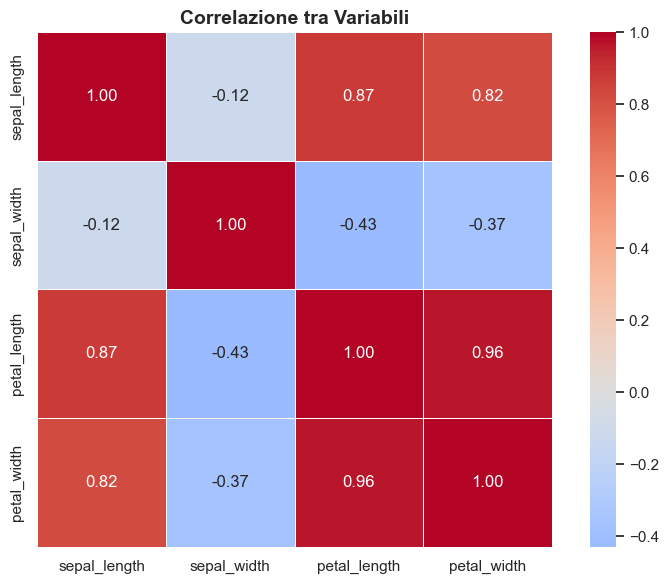

Petal_length e petal_width sono fortemente correlati (0.96)!


In [22]:
# Heatmap delle correlazioni
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,       # Mostra i numeri
    cmap='coolwarm',  # Blu=negativo, Rosso=positivo
    center=0,         # Centra la scala sullo zero
    fmt='.2f',        # Due decimali
    square=True,      # Celle quadrate
    linewidths=0.5    # Bordi tra celle
)
plt.title('Correlazione tra Variabili', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Petal_length e petal_width sono fortemente correlati (0.96)!")

---

## 7. Pair Plot (Esplorazione Rapida)

Crea una **griglia di grafici** che mostra le relazioni tra tutte le variabili numeriche.

Perfetto per esplorare un nuovo dataset in un colpo solo!

### La funzione: `sns.pairplot()`

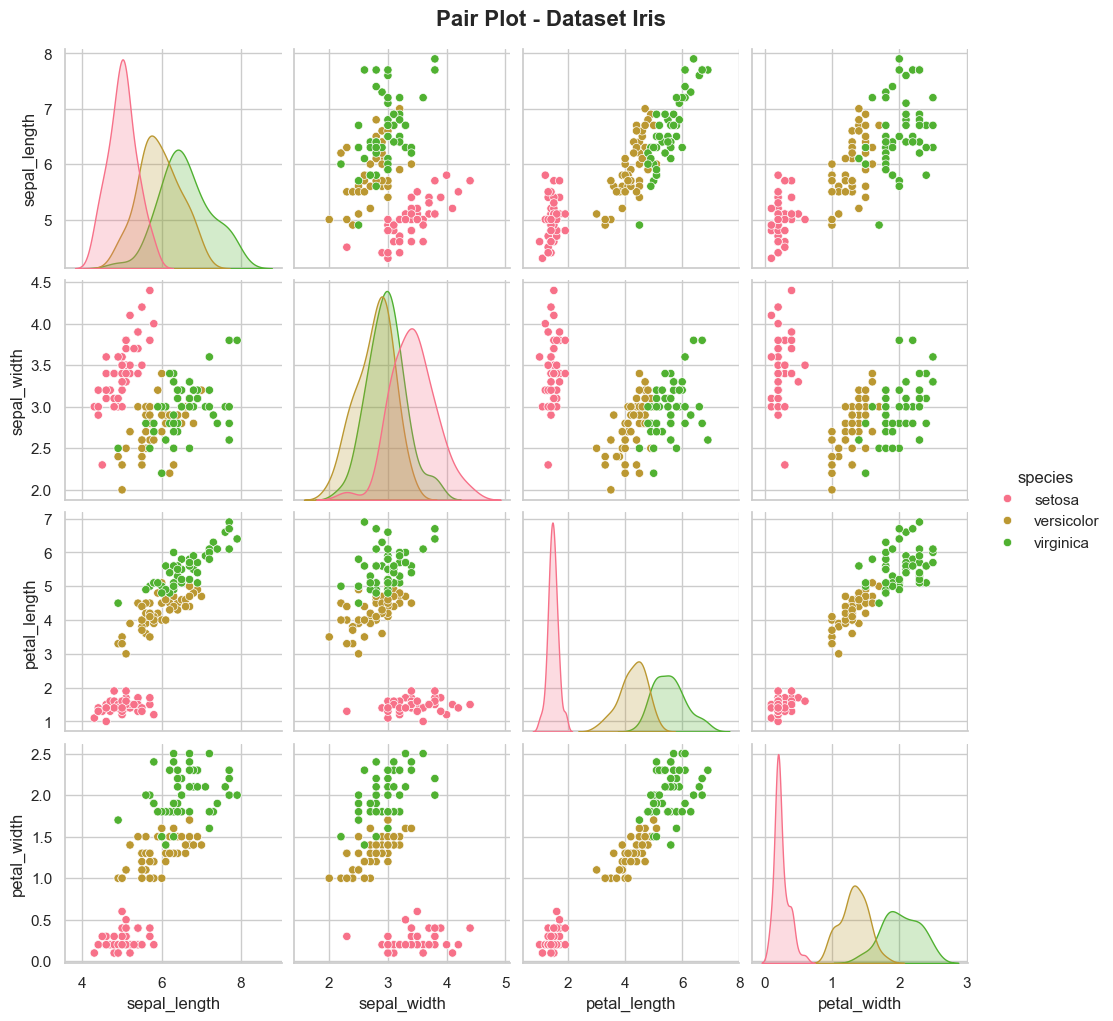

Diagonale: distribuzione di ogni variabile
Fuori diagonale: scatter plot tra coppie di variabili


In [23]:
# Pair plot - esplora tutte le relazioni!
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pair Plot - Dataset Iris', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("Diagonale: distribuzione di ogni variabile")
print("Fuori diagonale: scatter plot tra coppie di variabili")

## 8. Subplot

1) Per creare una griglia di grafici

- `fig, axes = plt.subplots(nrows, ncols, figsize=(w,h))` crea una Figure (`fig`) e una matrice di Axes (`axes`).
  - `nrows` = numero di righe, `ncols` = numero di colonne.
  - `figsize` = dimensione della figura in pollici (larghezza, altezza).

Esempio:
```python
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
```

2) Che cos'è `axes` e come accedervi

- Se `nrows * ncols > 1`, `axes` è un array NumPy (es. shape `(2,2)`).
- Puoi accedere ai singoli plot con `axes[0,0]`, `axes[0,1]`, `axes[1,0]`, `axes[1,1]`.
- Se preferisci un elenco 1D, usa `axes = axes.flatten()`.

3) Condividere assi

- `plt.subplots(..., sharex=True)` o `sharey=True` fa sì che gli assi X o Y siano condivisi (stessa scala) tra i subplot.
- Utile quando confronti la stessa variabile su più gruppi.

4) Disegnare con Seaborn su un subplot

- Seaborn accetta `ax=` per disegnare su un `Axes` specifico. Esempio:
```python
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=axes[0,0])
```
- Dopo aver chiamato seaborn su un `ax`, puoi usare metodi Matplotlib su quell'`ax` (es. `axes[0,0].set_title()` o `axes[0,0].set_xlim()`).


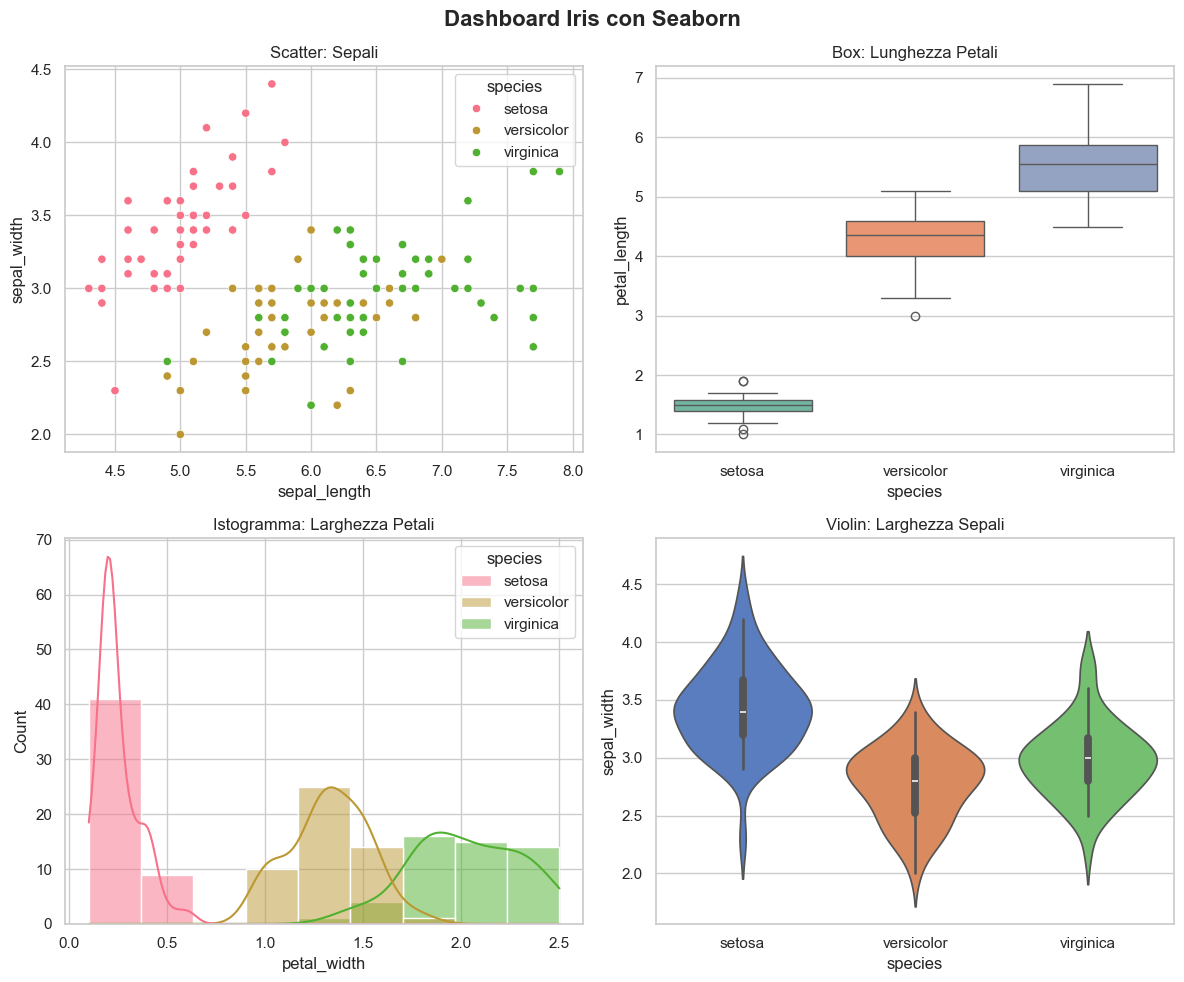

In [24]:
# Creiamo una griglia 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Grafico 1: Scatter plot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', 
                hue='species', ax=axes[0, 0])
axes[0, 0].set_title('Scatter: Sepali')

# Grafico 2: Box plot
sns.boxplot(data=df, x='species', y='petal_length', hue='species',
            palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Box: Lunghezza Petali')

# Grafico 3: Istogramma
sns.histplot(data=df, x='petal_width', hue='species', 
             kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Istogramma: Larghezza Petali')

# Grafico 4: Violin plot
sns.violinplot(data=df, x='species', y='sepal_width', hue='species',
               palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Violin: Larghezza Sepali')

plt.suptitle('Dashboard Iris con Seaborn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 9. Personalizzazione Stili

Seaborn ha stili predefiniti che puoi cambiare facilmente:

- `'whitegrid'` - sfondo bianco con griglia (default)
- `'darkgrid'` - sfondo grigio con griglia
- `'white'` - sfondo bianco senza griglia
- `'dark'` - sfondo grigio senza griglia
- `'ticks'` - aggiunge tacchette sugli assi

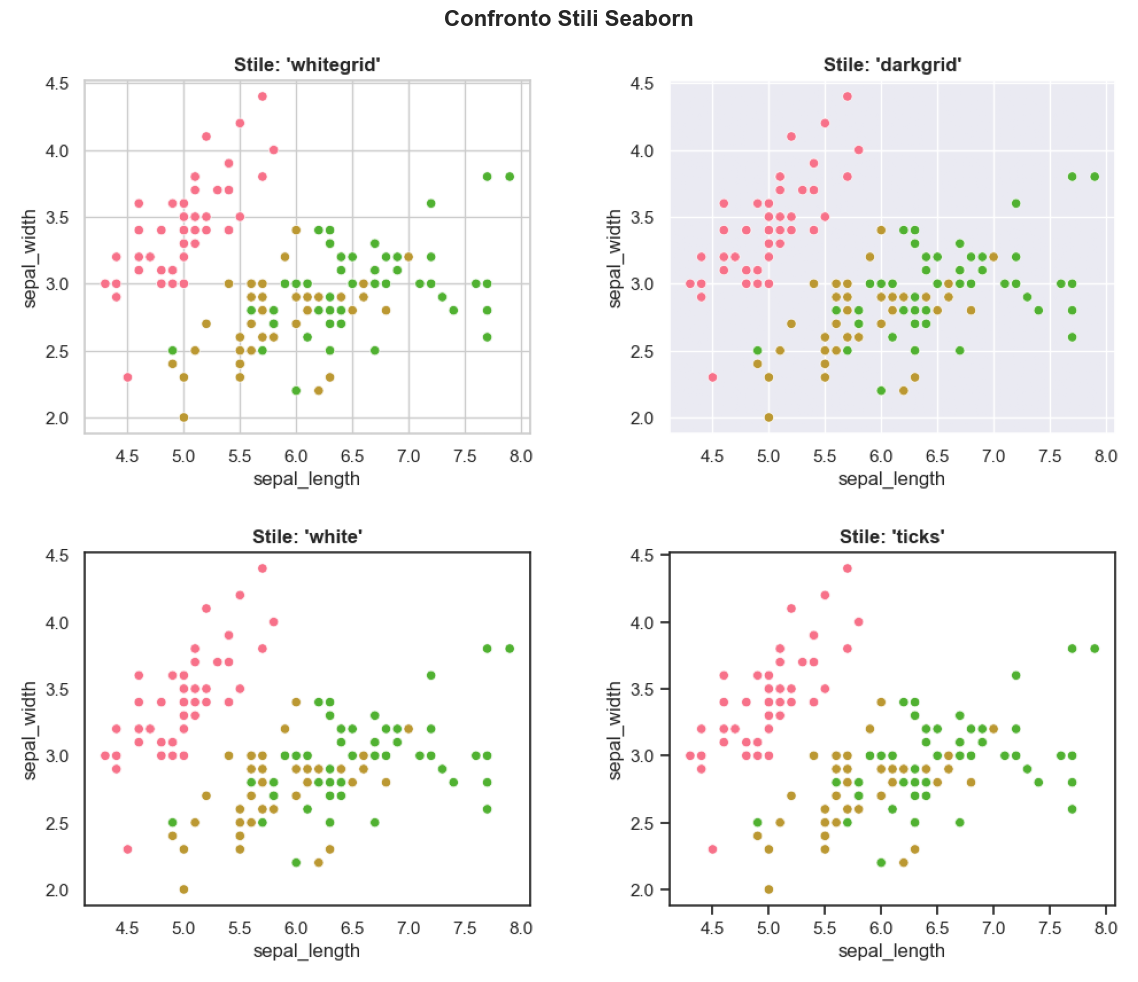

Differenze principali:
  - whitegrid: sfondo bianco CON griglia
  - darkgrid: sfondo grigio CON griglia
  - white: sfondo bianco SENZA griglia
  - ticks: sfondo bianco con tacchette sugli assi


In [25]:
# Confronto stili - 4 grafici separati per vedere le differenze
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from io import BytesIO

stili = ['whitegrid', 'darkgrid', 'white', 'ticks']
images = []
# Creiamo ogni grafico separatamente e lo salviamo come immagine
for stile in stili:
    sns.set_style(stile)
    fig_temp, ax_temp = plt.subplots(figsize=(5, 4))
    sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax_temp)
    ax_temp.set_title(f"Stile: '{stile}'", fontweight='bold')
    ax_temp.legend().remove()
    
    # Salva in memoria
    
    fig_temp.savefig(f"{stile}.png", format='png', dpi=100, bbox_inches='tight')
    images.append(mpimg.imread(f"{stile}.png"))
    plt.close(fig_temp)

# Mostra tutti insieme
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, img, stile in zip(axes.flatten(), images, stili):
    ax.imshow(img)
    ax.axis('off')

plt.suptitle('Confronto Stili Seaborn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Ripristina lo stile predefinito
sns.set_style('whitegrid')

print("Differenze principali:")
print("  - whitegrid: sfondo bianco CON griglia")
print("  - darkgrid: sfondo grigio CON griglia") 
print("  - white: sfondo bianco SENZA griglia")
print("  - ticks: sfondo bianco con tacchette sugli assi")

### Palette di Colori

Alcune palette popolari:
- `'husl'` - colori vivaci
- `'Set2'` - colori pastello
- `'viridis'` - scala da viola a giallo
- `'coolwarm'` - blu-rosso
- `'pastel'` - colori tenui

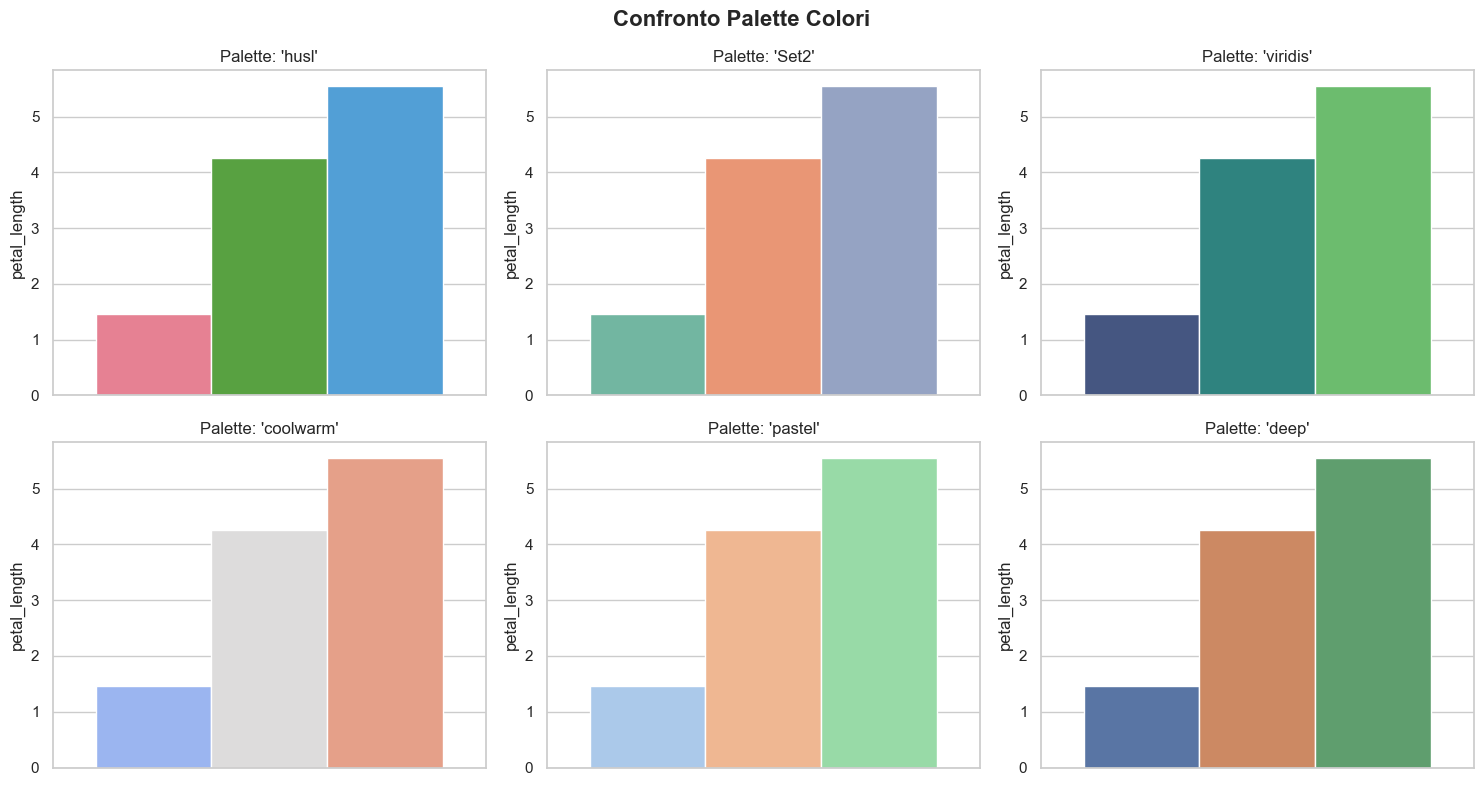

In [26]:
# Mostriamo diverse palette
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
palette_list = ['husl', 'Set2', 'viridis', 'coolwarm', 'pastel', 'deep']

for ax, pal in zip(axes.flatten(), palette_list):
    sns.barplot(data=df, hue='species', y='petal_length', legend=False, 
               palette=pal, ax=ax, errorbar=None)
    ax.set_title(f"Palette: '{pal}'")
    ax.set_xlabel('')

plt.suptitle('Confronto Palette Colori', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
# PROGETTO FINALE: Mini Dashboard

Scegli un dataset di seaborn di tuo interesse al seguente link: https://github.com/mwaskom/seaborn-data?tab=readme-ov-file

Crea una dashboard con 4 grafici che esplorano quel dataset. Alla fine votiamo la dashboard più bella, quindi occhio allo stile!
Potete usare anche altri grafici rispetto a quelli mostrati in questo notebook, qui trovate degli esempi: https://seaborn.pydata.org/examples/index.html

In [ ]:
# Esempio di caricamento del dataset Wine
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = pd.Categorical.from_codes(wine.target, wine.target_names)

---

## Esempio PROGETTO FINALE: Mini Dashboard

Creiamo una dashboard con 4 grafici che esplorano il dataset Wine!

### Disegneremo:
1. **Scatter plot** di `alcohol` vs `color_intensity`, colorato per classe
2. **Box plot** di `alcohol` per ogni classe
3. **Istogramma** di `malic_acid` con KDE
4. **Heatmap** delle correlazioni (con 5 variabili)

Dataset Wine caricato!
Dimensioni: (178, 14)
Classi: ['class_0', 'class_1', 'class_2']

Colonne:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'class']


C:\Users\gonza\AppData\Local\Temp\ipykernel_5856\3050303991.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine_df, x='class', y='alcohol',


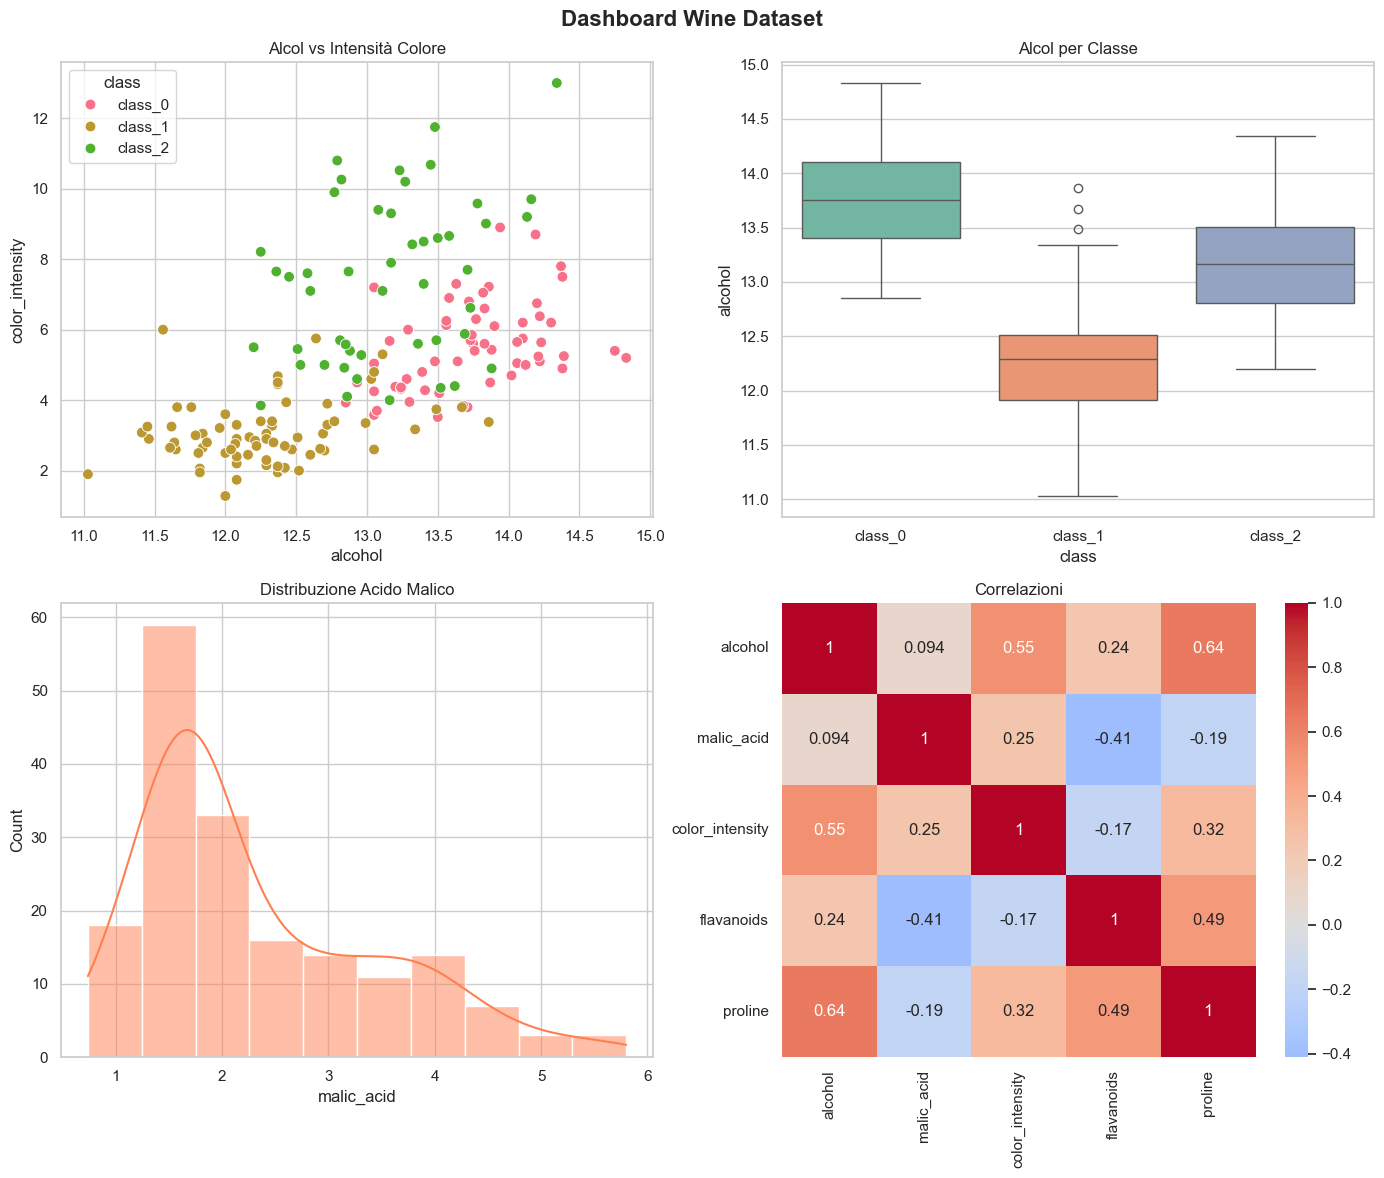

In [ ]:
# Carichiamo il dataset Wine
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = pd.Categorical.from_codes(wine.target, wine.target_names)

print("Dataset Wine caricato!")
print(f"Dimensioni: {wine_df.shape}")
print(f"Classi: {list(wine_df['class'].unique())}")
print("\nColonne:")
print(wine_df.columns.tolist())

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Scatter plot
sns.scatterplot(data=wine_df, x='alcohol', y='color_intensity', hue='class', ax=axes[0, 0], s=60)
axes[0, 0].set_title('Alcol vs Intensità Colore')

# 2. Box plot
sns.boxplot(data=wine_df, x='class', y='alcohol', 
           palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Alcol per Classe')

# 3. Istogramma
sns.histplot(data=wine_df, x='malic_acid', kde=True, 
            color='coral', ax=axes[1, 0])
axes[1, 0].set_title('Distribuzione Acido Malico')

# 4. Heatmap
cols = ['alcohol', 'malic_acid', 'color_intensity', 'flavanoids', 'proline']
corr = wine_df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlazioni')

plt.suptitle('Dashboard Wine Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()

# Ora prova tu!


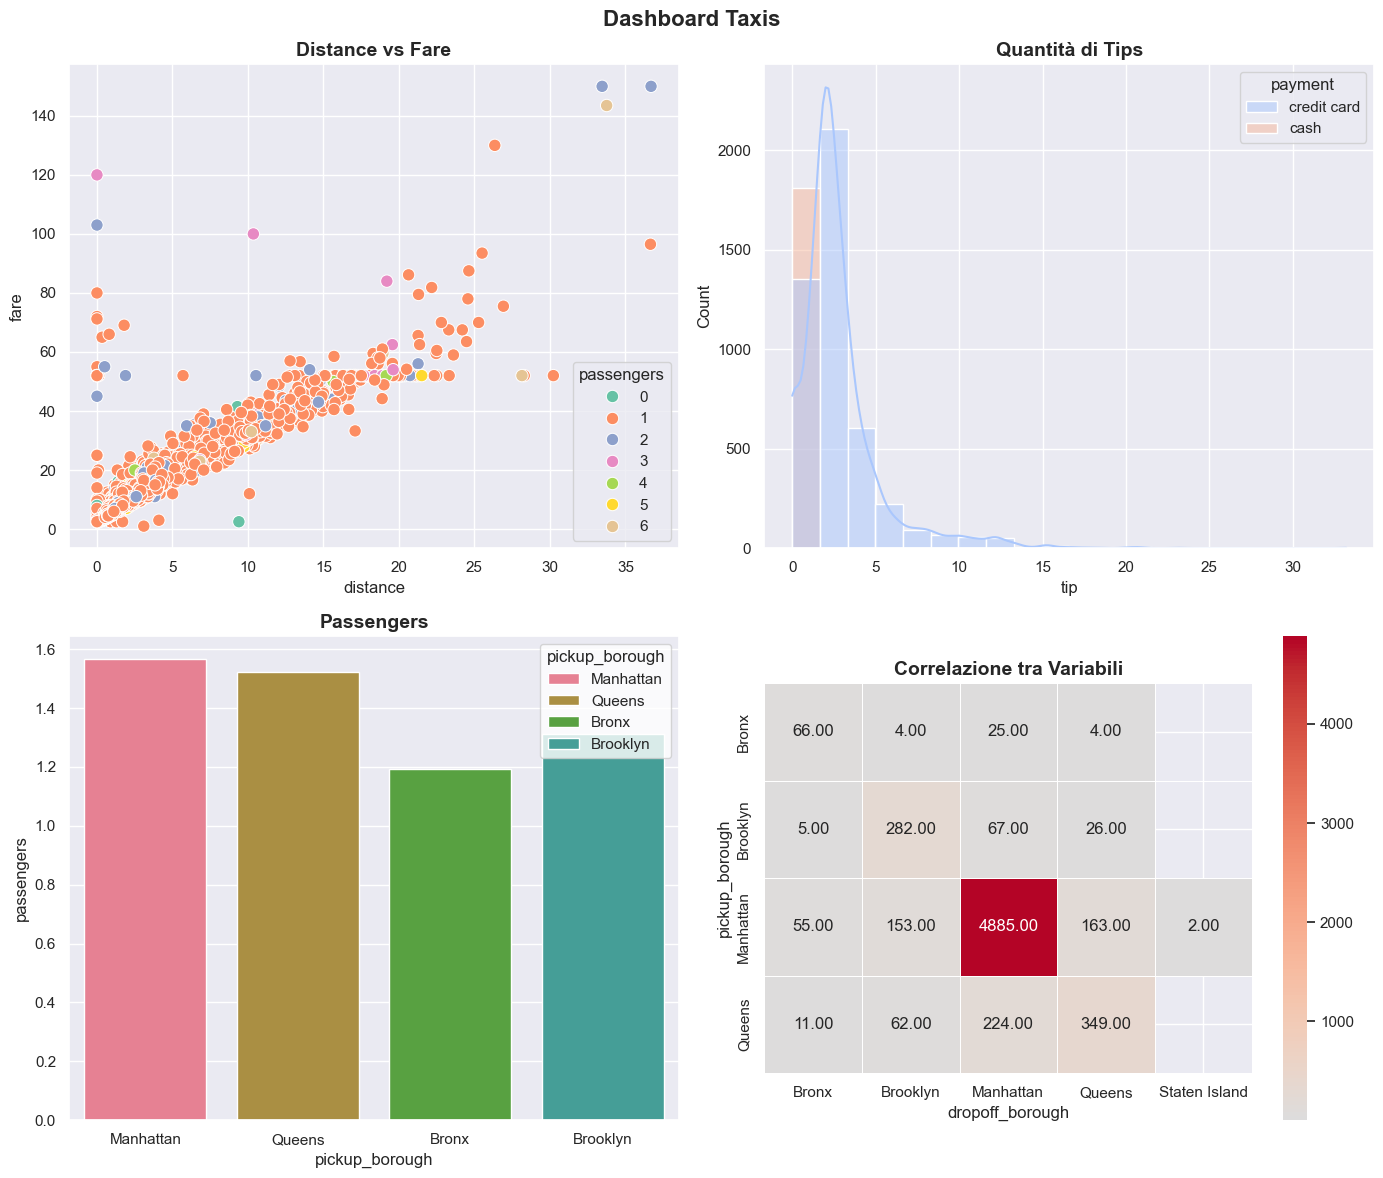

In [103]:
# Il tuo codice qui
df = sns.load_dataset('taxis')
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

#1 Scatter plot
sns.scatterplot(data=df, x='distance', y='fare', hue='passengers', palette='Set2', ax = axes[0, 0], s=80)
sns.set_style("darkgrid")
axes[0, 0].set_title('Distance vs Fare', fontsize=14, fontweight='bold')

#2 Istogramma
sns.histplot(data=df, x="tip", bins=20, hue='payment', palette='coolwarm', kde=True, ax = axes[0, 1])
sns.set_style("whitegrid")
axes[0, 1].set_title('Quantità di Tips', fontsize=14, fontweight='bold')

#3 Barplot
sns.barplot(data=df, x="pickup_borough", y="passengers", hue="pickup_borough", errorbar=None, ax=axes[1, 0])
sns.set_style("ticks")
axes[1, 0].set_title('Passengers', fontsize=14, fontweight='bold')

#4 Heatmap
correlation = pd.pivot_table(
    df,
    values="fare",
    index="pickup_borough",
    columns="dropoff_borough",
    aggfunc="count"
)
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, ax = axes[1, 1])
sns.set_style("darkgrid")
axes[1, 1].set_title('Correlazione tra Variabili', fontsize=14, fontweight='bold')

plt.suptitle('Dashboard Taxis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


---

## Riepilogo Comandi Seaborn

| Tipo di Grafico | Funzione | Uso Principale |
|---|---|---|
| Scatter Plot | `sns.scatterplot()` | Relazione tra 2 variabili |
| Istogramma | `sns.histplot()` | Distribuzione di 1 variabile |
| Densità | `sns.kdeplot()` | Distribuzione liscia |
| Box Plot | `sns.boxplot()` | Confronto distribuzioni |
| Violin Plot | `sns.violinplot()` | Box + distribuzione |
| Bar Plot (media) | `sns.barplot()` | Media per categoria |
| Bar Plot (conteggio) | `sns.countplot()` | Conteggio per categoria |
| Heatmap | `sns.heatmap()` | Matrice di valori/correlazioni |
| Pair Plot | `sns.pairplot()` | Esplorazione completa |

### Parametri Comuni

- `data=` → DataFrame
- `x=, y=` → colonne da visualizzare
- `hue=` → colora per categoria
- `palette=` → colori ('Set2', 'viridis', 'husl'...)
- `ax=` → specifica dove disegnare (per subplot)

---

## Risorse

- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html) - Esempi di grafici
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - Guide ufficiali
- [Seaborn Palette (Colori)](https://www.practicalpythonfordatascience.com/ap_seaborn_palette) - Palette disponibili

---

## Congratulazioni!

Ora sai creare grafici professionali con **poche righe di codice**! 

Seaborn ti permette di:
- Esplorare dati velocemente
- Creare visualizzazioni eleganti
- Integrare facilmente con Pandas

Continua a praticare e sperimenta con i tuoi dataset!